## **Ensemble Methods and Comparisons Dono kar diya**

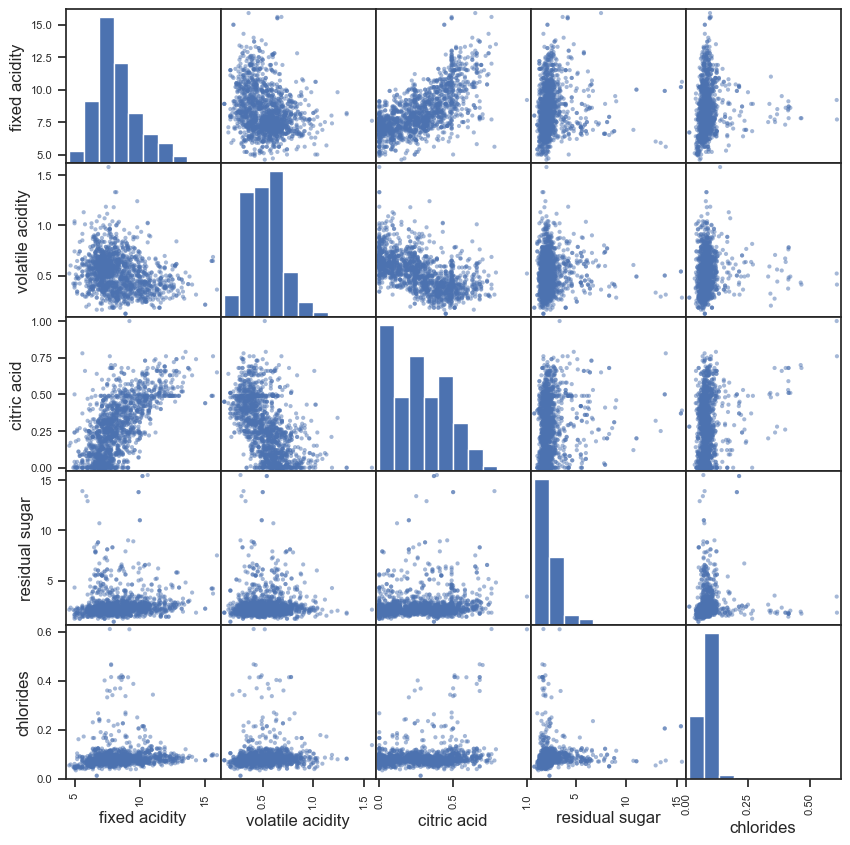

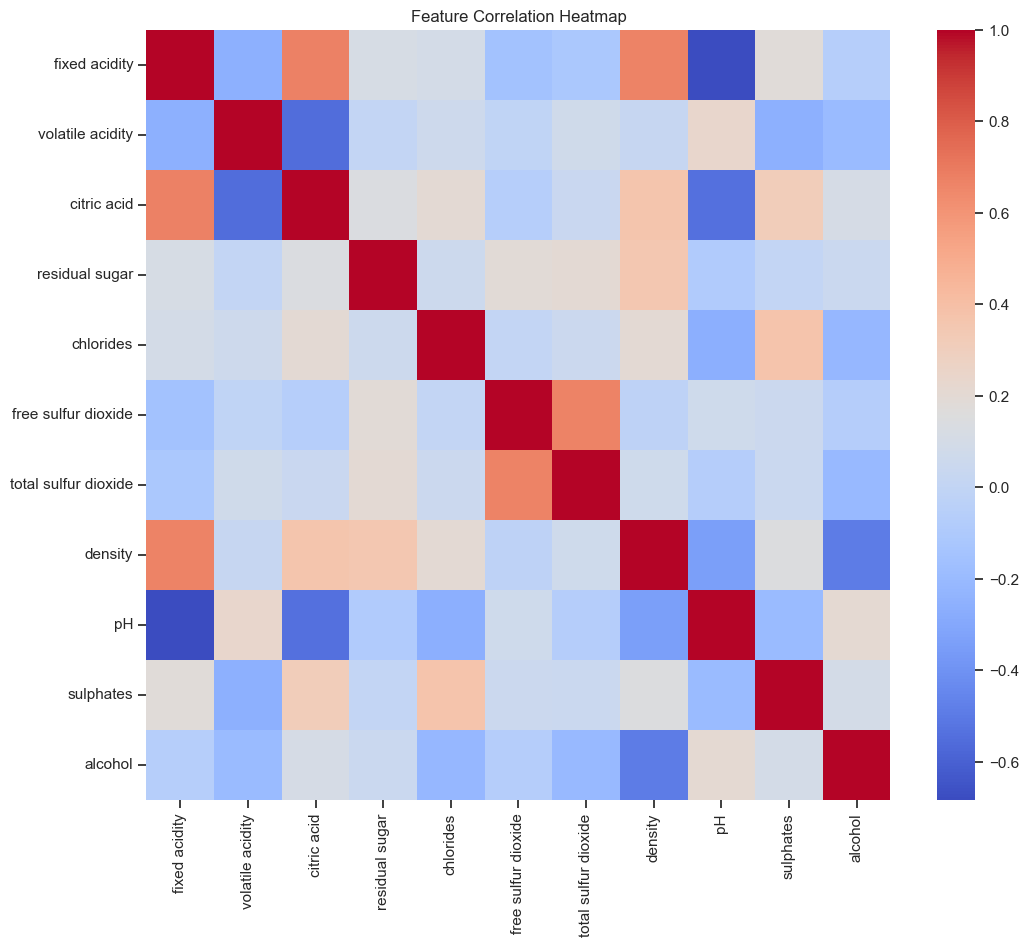

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error ,r2_score , mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris,load_breast_cancer,load_wine,fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score,classification_report

# ==============================
# Dataset Selection (Uncomment the desired dataset)
# ==============================

# 1. Breast Cancer Dataset (sklearn default):
# breast_cancer = load_breast_cancer()
# df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
# labels = breast_cancer.target

# # 2. External Breast Cancer Dataset (CSV):
# df = pd.read_csv("breast-cancer.csv")
# labels = df['diagnosis']  # Assuming 'diagnosis' is the correct column name
# df = df.drop(['diagnosis'], axis=1)

# 3. Red Wine Quality Dataset:
df = pd.read_csv("winequality-red.csv", delimiter=",")
labels = df['quality']
df = df.drop(['quality'], axis=1)

# # 4. Housing Loan Approval Dataset:
# df = pd.read_csv("loan_sanction_train.csv")
# labels = df['Loan_Status']  # Assuming 'Loan_Status' is the target column
# labels = LabelEncoder().fit_transform(labels)  # Encode categorical target
# # Drop target column and preprocess categorical features
# df = df.drop(['Loan_Status'], axis=1)
# df = pd.get_dummies(df, drop_first=True)

# Exploratory Data Analysis for all 3
scatter_matrix(df.iloc[:, :5], figsize=(10, 10))  # Using first 5 features for visualization
plt.show()

sns.set(style="ticks", color_codes=True)
if 'species' in df.columns:
    sns.pairplot(df, hue='species')

plt.figure(figsize=(12, 10))

# #housing dataset ke liya
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Filter features with a correlation greater than a threshold
# threshold = 0.5  # Adjust this value to include more features
# high_corr_var = (correlation_matrix.abs() > threshold).sum(axis=1) > 1
# filtered_corr_matrix = correlation_matrix.loc[high_corr_var, high_corr_var]

# # Ensure the filtered correlation matrix is not empty
# if not filtered_corr_matrix.empty:
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(
#         filtered_corr_matrix,
#         cmap='coolwarm',
#         annot=True,
#         fmt=".2f",
#         cbar=True,
#         square=True
#     )
#     plt.title('Filtered Feature Correlation Heatmap')
#     plt.show()
# else:
#     print("No features meet the correlation threshold. Try lowering the threshold.")

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



# ==============================
# Preprocessing (Applies to all datasets , Except Bahar wala Breast cancer)
# ==============================

# Impute missing values and scale features
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# # ==============================
# # Preprocessing (Applies  Bahar wala Breast cancer)
# # ==============================

# # Encode categorical labels to numeric
# label_encoder = LabelEncoder()
# labels_encoded = label_encoder.fit_transform(labels)


# Impute missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df)

# Scale the imputed dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels, test_size=0.2, random_state=42) # rest sabke liya
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, labels_encoded, test_size=0.2, random_state=42) # for bahar wala breast cancer


[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 7 5 5 7 5 5 5 6 6 5 5 7 5 5 6 5 5 6 5 6 5 6
 6 6 6 5 5 6 5 6 6 7 5 5 6 5 5 6 6 5 5 6 5 6 5 5 6 5 5 7 5 7 5 6 5 7 5 6 6
 6 5 7 6 6 7 5 7 5 6 6 6 5 6 6 5 6 5 6 6 5 6 5 6 5 6 5 5 6 6 6 6 6 5 6 5 7
 5 6 5 6 6 6 5 5 6 6 5 6 5 5 5 6 6 5 6 6 5 5 6 6 5 5 5 5 6 6 6 6 6 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 5 6 6 5 5 5 5 6 5 7 5
 6 6 6 7 5 6 6 6 6 6 5 5 5 5 6 5 5 5 5 7 6 5 6 6 6 6 5 6 6 7 6 5 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 6 5 7 5 6 6 5 5 4 5 6 6 6
 7 6 6 5 7 6 6 5 5 6 6 5 6 5 5 5 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 5 5 5 6
 5 6 6 7 5 5 6 5 5 5 6 6 6 7 6 6 5 5 5 6 5 5 6 5]
[[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 46 76 10  0]
 [ 0  0  3 30  9  0]
 [ 0  0  0  1  4  0]]


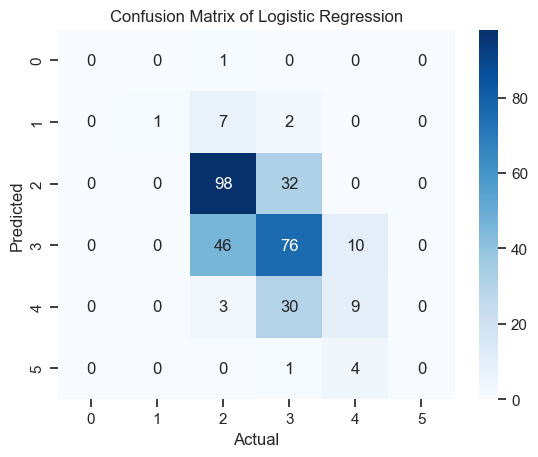

[5 5 6 6 6 5 5 5 6 6 7 6 6 5 5 7 5 5 7 5 4 6 5 6 5 6 6 6 5 6 5 5 5 5 5 5 6
 6 5 6 6 5 6 5 6 6 7 6 5 5 5 5 6 7 5 5 6 5 6 5 6 5 5 5 7 5 6 6 7 5 6 6 6 5
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 7 6 6 5 5 6 5 5 5 6 5 6 6 5 6 6 6 6 6 5 5 5 7
 5 6 5 5 6 5 5 5 6 6 5 6 5 6 6 6 5 5 5 6 5 5 6 5 5 5 5 5 6 6 6 5 6 6 5 5 3
 6 5 6 6 5 5 6 6 5 5 5 6 5 6 6 5 5 6 5 5 5 5 5 5 5 6 5 6 6 5 6 5 4 7 6 7 5
 6 6 6 7 6 6 6 5 6 6 5 5 6 5 6 6 5 5 5 6 6 5 5 5 5 7 5 6 6 6 7 6 5 6 6 6 6
 7 6 6 5 6 7 6 5 6 4 6 6 5 6 5 6 6 5 6 5 6 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5 5
 7 7 6 5 7 6 7 6 5 5 6 5 6 5 6 6 5 6 6 6 6 7 6 5 5 5 6 5 6 6 6 5 6 5 6 5 6
 5 7 6 7 6 5 6 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 6 6]
[[ 0  0  0  1  0  0]
 [ 0  1  3  6  0  0]
 [ 0  2 88 40  0  0]
 [ 1  0 47 74 10  0]
 [ 0  0  7 21 14  0]
 [ 0  0  1  1  3  0]]


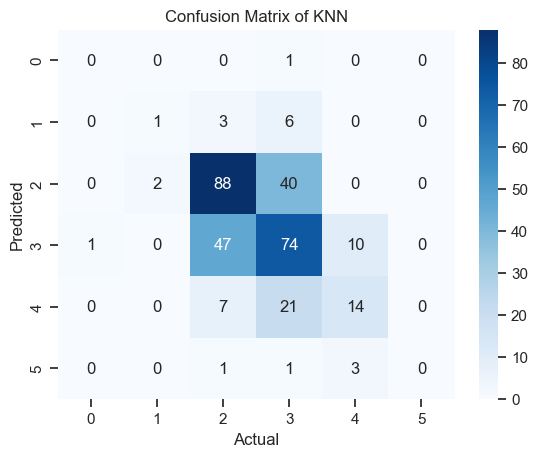

[5 6 5 4 6 5 5 5 6 6 7 6 6 5 5 6 6 6 7 5 5 6 6 6 6 6 6 6 6 6 6 6 6 4 6 5 6
 6 5 6 6 5 6 5 5 6 6 5 5 6 5 5 6 7 5 6 6 5 6 5 6 5 6 5 7 6 6 6 7 5 6 6 5 5
 6 5 6 5 5 7 5 7 5 6 7 7 5 6 6 6 6 5 5 5 5 5 5 5 5 5 5 5 6 7 6 7 6 5 7 6 6
 5 7 5 5 6 7 5 5 6 6 6 6 6 6 5 7 5 5 5 5 5 5 6 6 4 5 6 5 7 7 6 5 4 5 5 6 6
 5 5 6 6 5 5 5 5 5 7 5 6 5 5 7 5 6 5 6 5 3 5 5 5 7 5 7 6 6 5 5 5 6 5 6 6 5
 6 6 6 7 5 5 7 5 6 6 5 5 6 5 7 5 6 5 5 7 5 5 4 5 7 8 5 5 7 6 6 6 5 6 5 6 6
 6 5 4 5 5 7 5 6 6 5 7 6 5 7 5 7 6 5 7 5 6 7 5 7 5 5 8 5 6 4 5 6 6 5 5 4 6
 6 5 6 5 7 6 6 5 5 6 6 5 6 5 6 6 6 6 6 7 6 7 5 6 6 5 7 5 6 6 6 5 6 7 6 5 6
 5 7 6 6 5 5 6 5 6 5 4 6 6 7 5 5 5 5 4 6 5 5 6 5]
[[ 0  0  0  1  0  0]
 [ 0  1  3  6  0  0]
 [ 1  6 87 35  1  0]
 [ 0  3 44 67 17  1]
 [ 0  0  3 16 22  1]
 [ 0  0  1  3  1  0]]


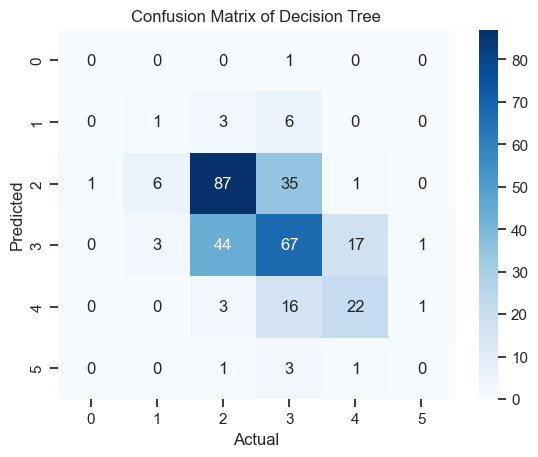

[5 5 5 5 6 5 5 5 6 6 7 5 6 5 6 6 6 6 7 5 5 6 5 6 5 6 6 5 5 6 5 6 6 6 6 5 6
 6 5 6 5 5 6 5 6 6 6 6 5 6 5 5 6 7 5 6 6 6 6 5 6 6 6 5 6 5 7 6 7 5 6 5 6 6
 6 5 7 5 6 6 5 7 5 6 6 6 5 6 6 6 6 6 5 5 5 5 5 6 5 6 5 5 6 7 6 7 6 5 6 5 7
 5 7 5 5 6 5 5 5 6 6 6 6 5 6 5 6 5 5 6 6 5 5 6 6 5 5 5 5 6 7 6 7 6 6 5 6 6
 6 5 6 6 5 5 6 5 5 7 5 6 6 6 6 5 5 6 6 5 5 5 5 5 7 5 7 6 6 5 5 5 5 6 5 6 5
 6 6 6 7 5 6 6 5 6 6 5 5 6 5 7 5 5 5 5 7 5 5 5 6 7 8 5 5 6 6 6 6 5 6 6 6 6
 6 6 6 5 5 7 5 5 5 5 6 6 5 7 5 6 6 5 5 5 6 7 5 7 6 6 6 5 6 5 5 6 6 5 5 6 6
 6 6 6 5 7 6 6 5 5 6 6 5 6 6 6 6 5 6 6 6 6 7 5 5 5 5 7 5 6 5 6 5 6 6 5 5 6
 5 7 6 6 5 5 6 5 6 5 6 6 6 7 5 5 6 6 6 6 5 5 6 5]
[[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 98 32  0  0]
 [ 0  0 33 93  6  0]
 [ 0  0  0 22 19  1]
 [ 0  0  0  1  4  0]]


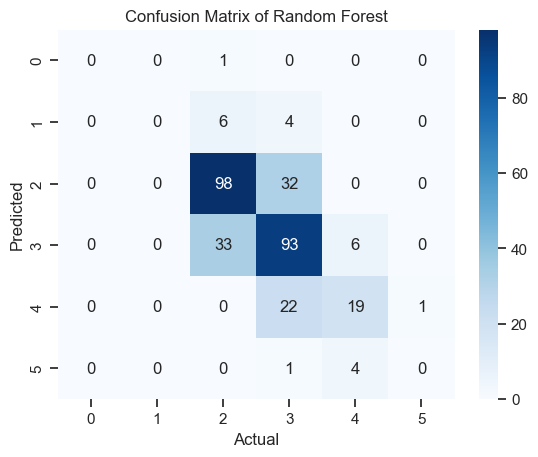

[5 5 5 5 6 5 5 5 6 6 7 5 6 5 5 8 6 6 7 5 5 6 6 6 6 6 6 6 5 6 5 6 6 5 5 5 6
 6 6 6 5 5 7 5 5 6 6 6 5 6 5 6 6 7 5 5 6 7 6 5 6 6 5 5 7 5 6 5 7 5 6 5 5 6
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 7 5 6 5 5 5 5 5 5 6 5 6 5 5 6 7 6 6 6 5 4 6 6
 5 7 5 6 7 6 5 5 6 6 6 6 5 6 5 6 6 5 6 5 5 5 6 6 5 5 5 5 6 7 6 7 5 5 5 6 5
 6 5 6 6 5 6 5 6 5 7 5 6 6 6 6 5 6 6 6 5 3 5 5 5 7 5 7 6 7 5 5 5 5 6 5 6 5
 6 6 6 7 5 5 6 5 6 6 5 5 5 6 6 5 8 5 5 7 5 5 5 6 7 8 5 5 8 7 6 6 5 6 5 5 6
 6 6 4 5 5 7 5 5 6 5 7 6 5 6 5 6 6 5 5 5 6 6 6 7 6 5 6 5 6 6 5 6 6 5 5 6 6
 6 6 6 5 6 5 7 6 5 6 6 5 6 5 5 6 6 6 7 6 6 7 5 5 5 5 6 5 6 5 6 5 6 3 5 5 6
 5 7 6 6 5 5 6 6 5 5 6 6 7 7 6 6 6 5 5 6 5 5 7 5]
[[ 0  0  1  0  0  0]
 [ 0  1  6  3  0  0]
 [ 1  0 97 30  2  0]
 [ 1  1 37 80 11  2]
 [ 0  0  1 21 18  2]
 [ 0  0  0  2  3  0]]


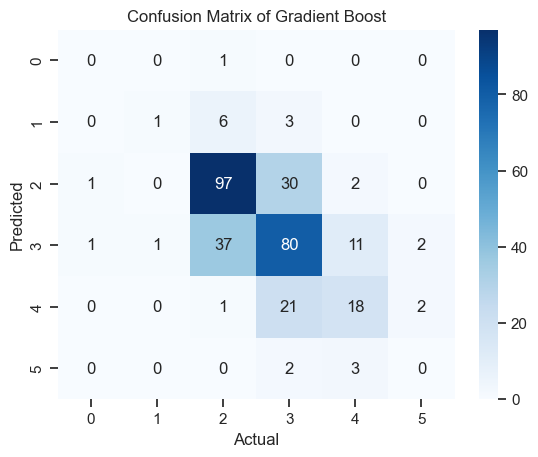

[5 5 6 5 6 5 5 5 7 6 6 5 5 5 5 6 5 6 7 5 5 6 5 6 6 6 6 5 5 6 5 6 6 6 6 5 6
 6 5 6 6 5 6 5 6 6 6 6 5 6 5 5 6 7 5 6 6 6 6 5 6 6 6 5 6 6 6 6 7 5 7 5 6 6
 6 5 7 5 5 7 5 7 5 6 6 6 5 6 6 5 6 6 5 5 5 5 5 6 5 6 6 5 6 7 6 6 6 6 6 5 6
 5 7 5 5 6 6 5 5 6 6 6 6 5 5 5 7 6 5 6 6 5 5 6 6 5 5 5 5 6 7 6 7 5 6 5 6 6
 5 5 6 6 5 5 6 5 6 7 5 6 5 6 6 5 5 6 6 5 5 5 6 5 7 5 7 5 6 5 5 5 5 6 5 6 5
 6 6 6 7 5 5 7 5 6 6 5 5 6 5 6 5 5 5 5 7 5 5 4 5 7 8 5 5 6 7 6 5 5 6 6 5 6
 6 6 4 5 5 7 5 5 6 6 7 6 5 6 5 6 6 5 6 5 6 7 5 6 6 6 6 5 6 5 5 6 6 5 5 4 5
 6 6 6 5 7 6 6 5 5 6 6 5 6 6 6 6 6 5 7 6 6 7 5 5 6 5 7 5 6 5 6 5 7 8 5 5 6
 5 7 7 6 5 5 7 5 6 5 6 6 6 7 5 5 6 6 6 6 5 5 7 5]
[[ 0  0  1  0  0  0]
 [ 0  1  7  2  0  0]
 [ 0  1 94 34  1  0]
 [ 0  1 35 82 13  1]
 [ 0  0  1 24 16  1]
 [ 0  0  0  1  4  0]]


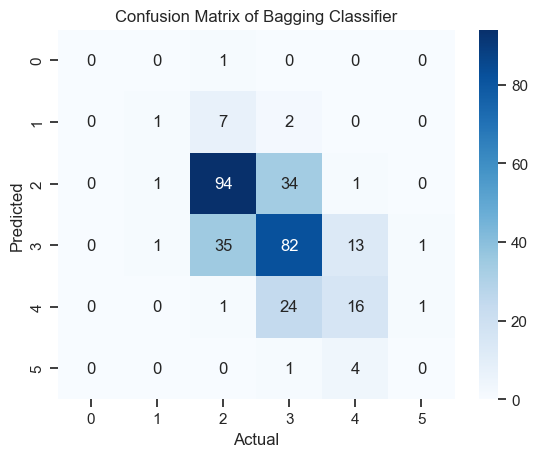

C:\Users\KEYUR JAIN\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[5 5 5 5 6 5 5 5 5 6 6 5 5 5 5 6 5 5 6 5 6 5 6 6 5 5 6 5 5 5 5 5 5 5 5 5 6
 6 5 6 5 5 5 5 5 5 6 5 6 5 5 5 6 6 5 5 6 5 6 5 5 6 5 5 6 5 6 5 6 5 6 5 5 6
 6 5 6 6 6 6 5 6 5 6 6 6 5 6 6 5 6 6 6 6 5 5 5 5 3 5 5 5 6 6 6 6 5 5 6 5 6
 5 5 5 5 5 6 5 5 6 6 5 5 6 5 5 6 5 5 6 5 5 5 6 5 5 5 5 5 6 5 5 6 6 5 5 6 6
 6 5 5 6 5 5 5 6 5 5 5 6 6 5 6 5 5 5 5 5 5 5 5 5 6 5 6 6 5 5 5 6 5 6 5 6 5
 6 6 6 6 5 5 6 5 6 5 5 5 5 5 6 5 5 5 5 6 6 5 5 5 6 6 5 5 6 6 6 5 5 6 5 5 6
 6 5 4 5 5 6 5 5 5 5 6 6 6 6 5 6 5 5 5 5 6 6 5 5 5 5 6 5 5 5 5 5 6 5 5 6 5
 6 6 6 5 6 5 6 5 5 6 6 5 6 5 5 5 5 5 6 6 5 6 3 5 5 5 6 5 5 5 6 5 6 5 5 5 6
 5 6 6 6 5 5 6 5 5 5 6 5 6 6 5 6 5 5 5 6 5 5 6 5]
[[  0   0   1   0   0   0]
 [  0   1   7   2   0   0]
 [  2   0 108  20   0   0]
 [  0   0  72  60   0   0]
 [  0   0   7  35   0   0]
 [  0   0   0   5   0   0]]


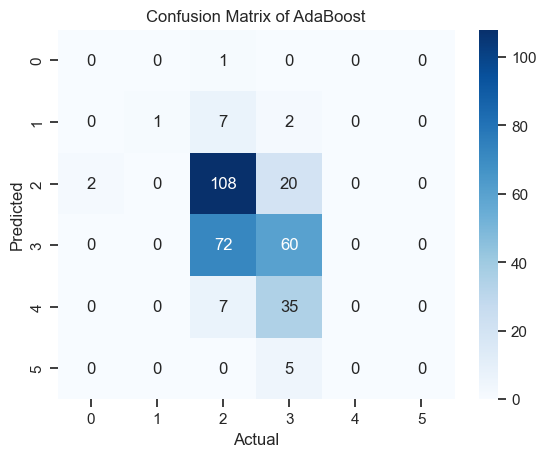

[5 5 6 5 6 5 5 5 6 6 6 5 6 5 5 6 5 6 7 5 5 5 6 6 5 5 6 5 5 6 5 5 6 5 6 5 6
 6 6 6 6 5 6 5 6 6 6 6 5 6 5 5 6 7 5 5 6 5 6 5 6 6 5 5 6 5 6 5 7 5 6 5 6 6
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 6 5 6 5 5 6 5 6 5 6 5 5 5 5 6 6 6 6 6 5 6 5 6
 5 6 5 6 6 6 5 5 6 6 6 6 5 5 5 6 6 5 6 6 5 5 6 6 5 5 5 5 6 6 6 6 5 6 5 6 5
 6 5 6 6 5 6 6 6 5 6 5 6 6 6 6 5 5 6 5 5 5 5 5 5 6 5 7 6 6 5 5 5 5 6 5 7 5
 6 6 6 7 5 6 6 5 6 6 5 5 5 6 6 5 5 5 5 7 6 5 5 6 5 7 5 6 6 6 6 6 5 6 5 5 6
 6 6 5 5 5 7 5 5 5 5 6 6 5 6 5 6 6 5 5 5 6 6 5 6 6 5 6 5 6 5 5 6 5 5 5 6 6
 6 6 6 5 7 6 6 5 5 6 6 5 6 5 5 6 5 6 6 6 5 7 5 5 5 5 6 5 6 5 6 5 7 6 5 5 6
 5 6 6 6 5 5 6 5 5 5 6 6 6 7 6 6 6 6 5 6 5 5 6 5]
[[ 0  0  1  0  0  0]
 [ 0  0  8  2  0  0]
 [ 0  0 99 31  0  0]
 [ 0  0 43 85  4  0]
 [ 0  0  1 32  9  0]
 [ 0  0  0  2  3  0]]


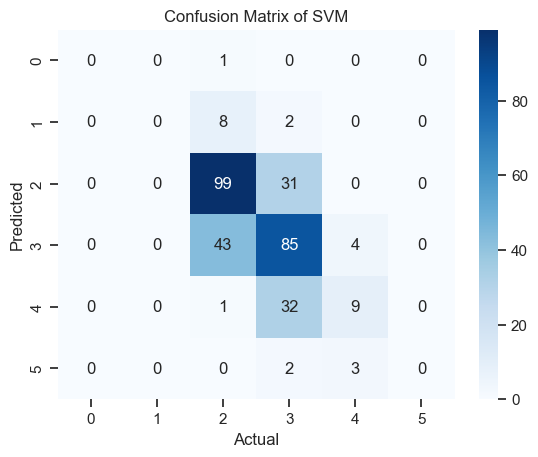

[5 5 6 5 6 5 5 5 6 6 7 5 6 5 5 7 5 6 7 5 5 5 6 7 5 6 7 6 5 7 5 6 6 5 5 5 7
 6 6 7 6 5 7 5 6 6 7 6 5 6 5 4 6 6 5 5 6 5 6 5 5 6 6 6 7 6 7 6 7 5 7 5 6 6
 6 5 7 5 6 7 6 7 5 6 6 7 5 6 7 5 6 5 6 6 5 6 5 6 5 5 5 5 6 6 5 6 6 5 6 5 7
 5 5 5 6 6 6 6 5 6 7 5 6 5 6 5 6 6 6 6 6 5 5 7 6 5 5 5 5 6 7 6 6 6 6 5 6 5
 6 5 6 7 5 6 6 6 5 6 6 6 7 5 6 5 5 6 5 5 5 5 5 5 7 5 5 6 6 5 5 4 5 7 5 7 5
 7 4 6 7 5 5 7 6 7 6 6 5 5 6 6 5 5 6 5 7 6 5 6 6 5 6 5 6 6 7 6 4 5 6 5 5 7
 7 6 4 5 5 7 5 6 5 5 7 6 7 6 5 6 5 5 6 5 6 7 4 6 6 5 8 5 6 6 5 5 3 5 5 6 6
 7 7 6 5 7 6 7 5 5 7 7 5 6 5 5 6 6 6 6 7 5 7 5 5 6 5 6 5 6 5 4 5 7 8 5 5 7
 5 7 6 7 6 5 6 5 5 5 6 6 6 7 6 6 5 6 5 6 5 5 6 5]
[[ 0  0  1  0  0  0]
 [ 1  2  6  1  0  0]
 [ 0  1 86 40  3  0]
 [ 0  4 37 65 24  2]
 [ 0  0  2 18 22  0]
 [ 0  0  0  1  4  0]]


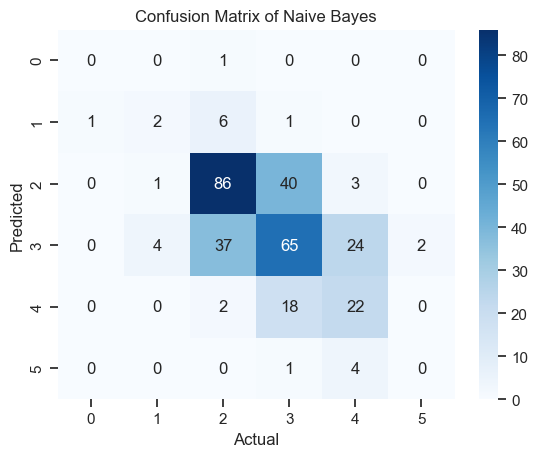

C:\Users\KEYUR JAIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KEYUR JAIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KEYUR JAIN\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

                 Model  Accuracy  Precision Score  Recall Score  \
0  Logistic Regression  0.575000         0.561804      0.575000   
1                  KNN  0.553125         0.536797      0.553125   
2        Decision Tree  0.553125         0.545584      0.553125   
3        Random Forest  0.656250         0.626873      0.656250   
4       Gradient Boost  0.612500         0.605266      0.612500   
5   Bagging Classifier  0.603125         0.585441      0.603125   
6             AdaBoost  0.528125         0.459119      0.528125   
7                  SVM  0.603125         0.569100      0.603125   
8          Naive Bayes  0.546875         0.542588      0.546875   

                                    F1 Score  AUC-ROC Score  
0  <function f1_score at 0x0000013BB0E2E980>       0.844913  
1  <function f1_score at 0x0000013BB0E2E980>       0.673580  
2  <function f1_score at 0x0000013BB0E2E980>       0.591739  
3  <function f1_score at 0x0000013BB0E2E980>       0.876396  
4  <function f1_sco

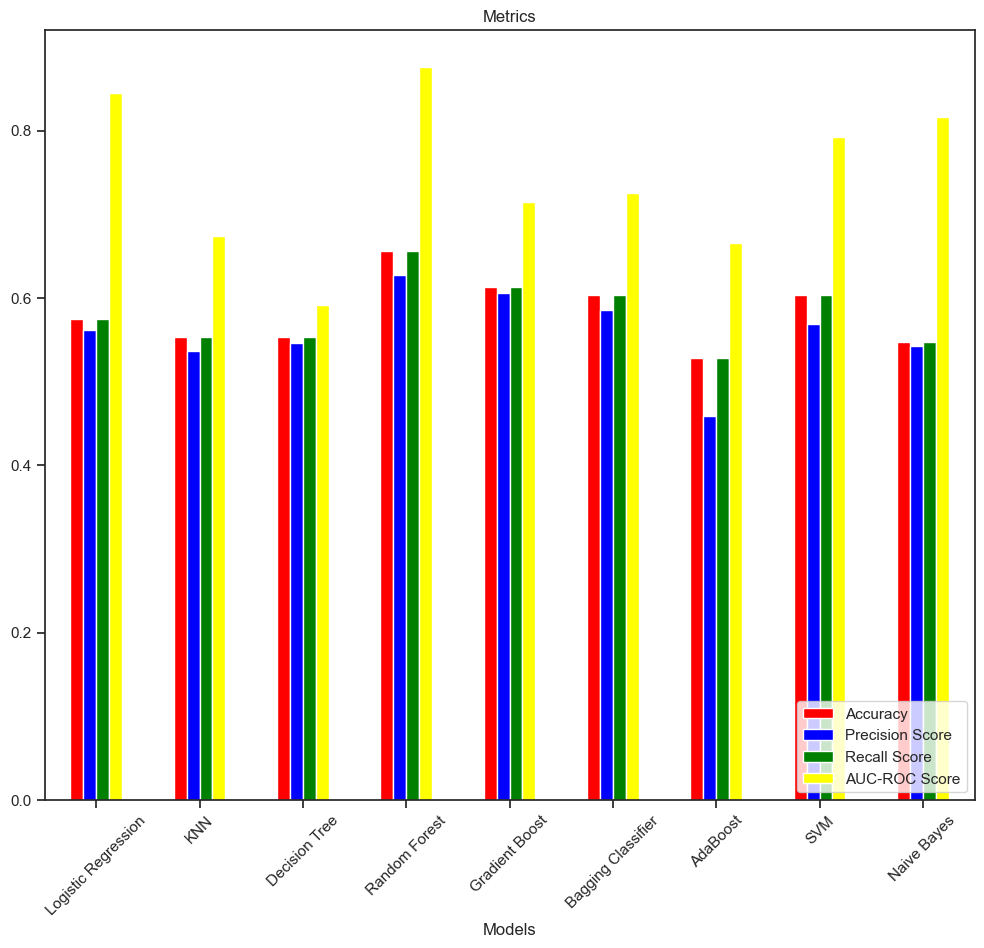

In [3]:
X_train
y_train
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)
y_prob_lr = lr.predict_proba(X_test) if hasattr(lr, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Logistic Regression')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)
y_prob_knn = knn.predict_proba(X_test) if hasattr(knn, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_knn)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of KNN')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(y_pred_tree)
y_prob_tree = tree.predict_proba(X_test) if hasattr(tree, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_tree)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(y_pred_forest)
y_prob_forest = forest.predict_proba(X_test) if hasattr(forest, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_forest)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)
y_pred_gr =gr.predict(X_test)
print(y_pred_gr)
y_prob_gr = gr.predict_proba(X_test) if hasattr(gr, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_gr)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Gradient Boost')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

bag = BaggingClassifier(estimator = DecisionTreeClassifier())
bag.fit(X_train, y_train)
y_pred_bag =bag.predict(X_test)
print(y_pred_bag)
y_prob_bag = bag.predict_proba(X_test) if hasattr(bag, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_bag)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Bagging Classifier')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada =ada.predict(X_test)
print(y_pred_ada)
y_prob_ada = ada.predict_proba(X_test) if hasattr(ada, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_ada)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of AdaBoost')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_pred_clf =clf.predict(X_test)
print(y_pred_clf)
y_prob_clf = clf.predict_proba(X_test) if hasattr(clf, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_clf)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of SVM')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred_bayes =bayes.predict(X_test)
print(y_pred_bayes)
y_prob_bayes = bayes.predict_proba(X_test) if hasattr(bayes, 'predict_proba') else None
cm = confusion_matrix(y_test,y_pred_bayes)
print(cm)
sns.heatmap(cm, annot = True, cmap = 'Blues' ,fmt='d')
plt.title('Confusion Matrix of Naive Bayes')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

models = ['Logistic Regression','KNN', 'Decision Tree', 'Random Forest','Gradient Boost','Bagging Classifier','AdaBoost','SVM','Naive Bayes']

accuracy = [accuracy_score(y_test, y_pred_lr),
            accuracy_score(y_test, y_pred_knn),
            accuracy_score(y_test, y_pred_tree),
            accuracy_score(y_test, y_pred_forest),
            accuracy_score(y_test, y_pred_gr),
            accuracy_score(y_test, y_pred_bag),
            accuracy_score(y_test, y_pred_ada),
            accuracy_score(y_test, y_pred_clf),
            accuracy_score(y_test, y_pred_bayes)]

precision = [precision_score(y_test, y_pred_lr,average='weighted'),
            precision_score(y_test, y_pred_knn,average='weighted'),
            precision_score(y_test, y_pred_tree,average='weighted'),
            precision_score(y_test, y_pred_forest,average='weighted'),
            precision_score(y_test, y_pred_gr,average='weighted'),
            precision_score(y_test, y_pred_bag,average='weighted'),
            precision_score(y_test, y_pred_ada,average='weighted'),
            precision_score(y_test, y_pred_clf,average='weighted'),
            precision_score(y_test, y_pred_bayes,average='weighted')]

recall = [recall_score(y_test, y_pred_lr,average='weighted'),
            recall_score(y_test, y_pred_knn,average='weighted'),
            recall_score(y_test, y_pred_tree,average='weighted'),
            recall_score(y_test, y_pred_forest,average='weighted'),
            recall_score(y_test, y_pred_gr,average='weighted'),
            recall_score(y_test, y_pred_bag,average='weighted'),
            recall_score(y_test, y_pred_ada,average='weighted'),
            recall_score(y_test, y_pred_clf,average='weighted'),
            recall_score(y_test, y_pred_bayes,average='weighted')]

# f1_score = [f1_score(y_test, y_pred_lr,average='weighted'),
#             f1_score(y_test, y_pred_knn,average='weighted'),
#             f1_score(y_test, y_pred_tree,average='weighted'),
#             f1_score(y_test, y_pred_forest,average='weighted'),
#             f1_score(y_test, y_pred_gr,average='weighted'),
#             f1_score(y_test, y_pred_bag,average='weighted'),
#             f1_score(y_test, y_pred_ada,average='weighted'),
#             f1_score(y_test, y_pred_clf,average='weighted'),
#             f1_score(y_test, y_pred_bayes,average='weighted')]

def auc(y_test, y_prob):
  if y_prob is not None:
    if len(np.unique(y_test))>2:
      roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
      roc_auc = roc_auc_score(y_test, y_prob[:, 1])
  else:
    roc_auc = 'N/A'
  return roc_auc

auc_roc = [auc(y_test, y_prob_lr),
            auc(y_test, y_prob_knn),
            auc(y_test, y_prob_tree),
            auc(y_test, y_prob_forest),
            auc(y_test, y_prob_gr),
            auc(y_test, y_prob_bag),
            auc(y_test, y_prob_ada),
            auc(y_test, y_prob_clf),
            auc(y_test, y_prob_bayes)]

performance_df = pd.DataFrame({
    "Model" : models,
    "Accuracy" : accuracy,
    "Precision Score" : precision,
    "Recall Score" : recall,
    "F1 Score" : f1_score,
    "AUC-ROC Score" : auc_roc
})

print(performance_df)

performance_df.set_index('Model').plot(kind='bar',figsize=(12,10),color=['red','blue','green','yellow','orange'])
plt.xticks(rotation=45)
plt.title("Metrics")
plt.xlabel('Models')
plt.legend(loc = 'lower right')
plt.show()

Extra

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Implement Bagging
print("\nImplementing Bagging...")
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging.fit(X_train_scaled, y_train)
bagging_results = evaluate_model(bagging, X_test_scaled, y_test)
print("Bagging performance:", bagging_results)

# Implement AdaBoost
print("\nImplementing AdaBoost...")
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost.fit(X_train_scaled, y_train)
adaboost_results = evaluate_model(adaboost, X_test_scaled, y_test)
print("AdaBoost performance:", adaboost_results)

# Implement Gradient Boosting
print("\nImplementing Gradient Boosting...")
gradboost = GradientBoostingClassifier(n_estimators=100, random_state=42)
gradboost.fit(X_train_scaled, y_train)
gradboost_results = evaluate_model(gradboost, X_test_scaled, y_test)
print("Gradient Boosting performance:", gradboost_results)

# Combine Results
ensemble_results = pd.DataFrame({
    "Bagging": bagging_results,
    "AdaBoost": adaboost_results,
    "Gradient Boosting": gradboost_results
}).T

print("\nEnsemble Methods Results:")
print(ensemble_results)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load Dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluation Function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }

# Initialize Models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, n_estimators=100)
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    results[name] = evaluate_model(model, X_test_scaled, y_test)
    print(f"{name} performance:", results[name])

# Add Ensemble Methods Results
results.update(ensemble_results.to_dict('index'))

# Display Results
df_results = pd.DataFrame(results).T
print("\nComparison of Model Performances:")
print(df_results)

# Heatmap Visualization
plt.figure(figsize=(12, 6))
sns.heatmap(df_results, annot=True, cmap='YlGnBu', fmt='.3f')
plt.title('Performance Comparison of Models')
plt.tight_layout()
plt.show()

# Bar Chart Visualization
metrics = ['accuracy', 'precision', 'recall', 'f1']
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Performance Comparison of Models (Bar Charts)', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    df_results[metric].plot(kind='bar', ax=ax)
    ax.set_title(f'{metric.capitalize()} Comparison')
    ax.set_ylabel(metric.capitalize())
    ax.set_xticklabels(df_results.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()
